# SyriaTel Customer churn prediction

### 1. Business Understanding

 #### Problem statement

syriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, leading to them discontinuing their services and looking for other service providers.
This analysis will help identify factors that are most likely lead to churning and predict what model can predict which customers are more likely to be lost therefore trying to work on customer retention.


Summary of the dataset

`state`: The state where the customer resides.

`phone number`: The phone number of the customer.

`international plan`: Whether the customer has an international plan (Yes or No).

`voice mail plan`: Whether the customer has a voice mail plan (Yes or No).

Numeric Features:

`area code`: The area code associated with the customer's phone number.

`account length`: The number of days the customer has been an account holder.

`number vmail messages`: The number of voice mail messages received by the customer.

`total day minutes`: The total number of minutes the customer used during the day.

`total day calls`: The total number of calls made by the customer during the day.

`total day charge`: The total charges incurred by the customer for daytime usage.

`total eve minutes`: The total number of minutes the customer used during the evening.

`total eve calls`: The total number of calls made by the customer during the evening.

`total eve charge`: The total charges incurred by the customer for evening usage.

`total night minutes`: The total number of minutes the customer used during the night.

`total night calls`: The total number of calls made by the customer during the night.

`total night charge`: The total charges incurred by the customer for nighttime usage.

`total intl minutes`: The total number of international minutes used by the customer.

`total intl calls`: The total number of international calls made by the customer.

`total intl charge`: The total charges incurred by the customer for international usage.

`customer service calls`: The number of customer service calls made by the customer.

### 2. Data understanding

In [573]:
#import modeles to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [522]:
# Load the dataset
df = pd.read_csv('syria tel churn dataset/bigml_59c28831336c6604c800002a.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [523]:
# check the last rows in the dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [524]:
#check the shape of the dataframe
df.shape

(3333, 21)

In [525]:
#check the numerical data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [527]:
# highlight numerical and categorical columns
numeric_cols = ['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
categorical_cols = ['state','area code','international plan','voice mail plan']

# Data cleaning


In [528]:
#checking for duplicated rows
df.duplicated().sum()

0

In [529]:
#checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [530]:
 #drop unused columns in all dataframes
data = df.drop(['area code','phone number'], axis =1)
data.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [531]:
# Remove any trailing white spaces in all columns
data.columns = data.columns.str.strip() 

### 3. Exploratory Data Analysis

In [574]:
#plotting the target variable distribution
class_counts = data.groupby("churn").size()

# Create a bar chart of the value counts using Plotly
fig = go.Figure(
    data=[go.Bar(x=class_counts.index, y=class_counts.values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), 
          hovermode = 'closest',width=600)
)

# Show the chart
fig.show()

C:\Users\karay\AppData\Local\Temp\ipykernel_3004\875484896.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


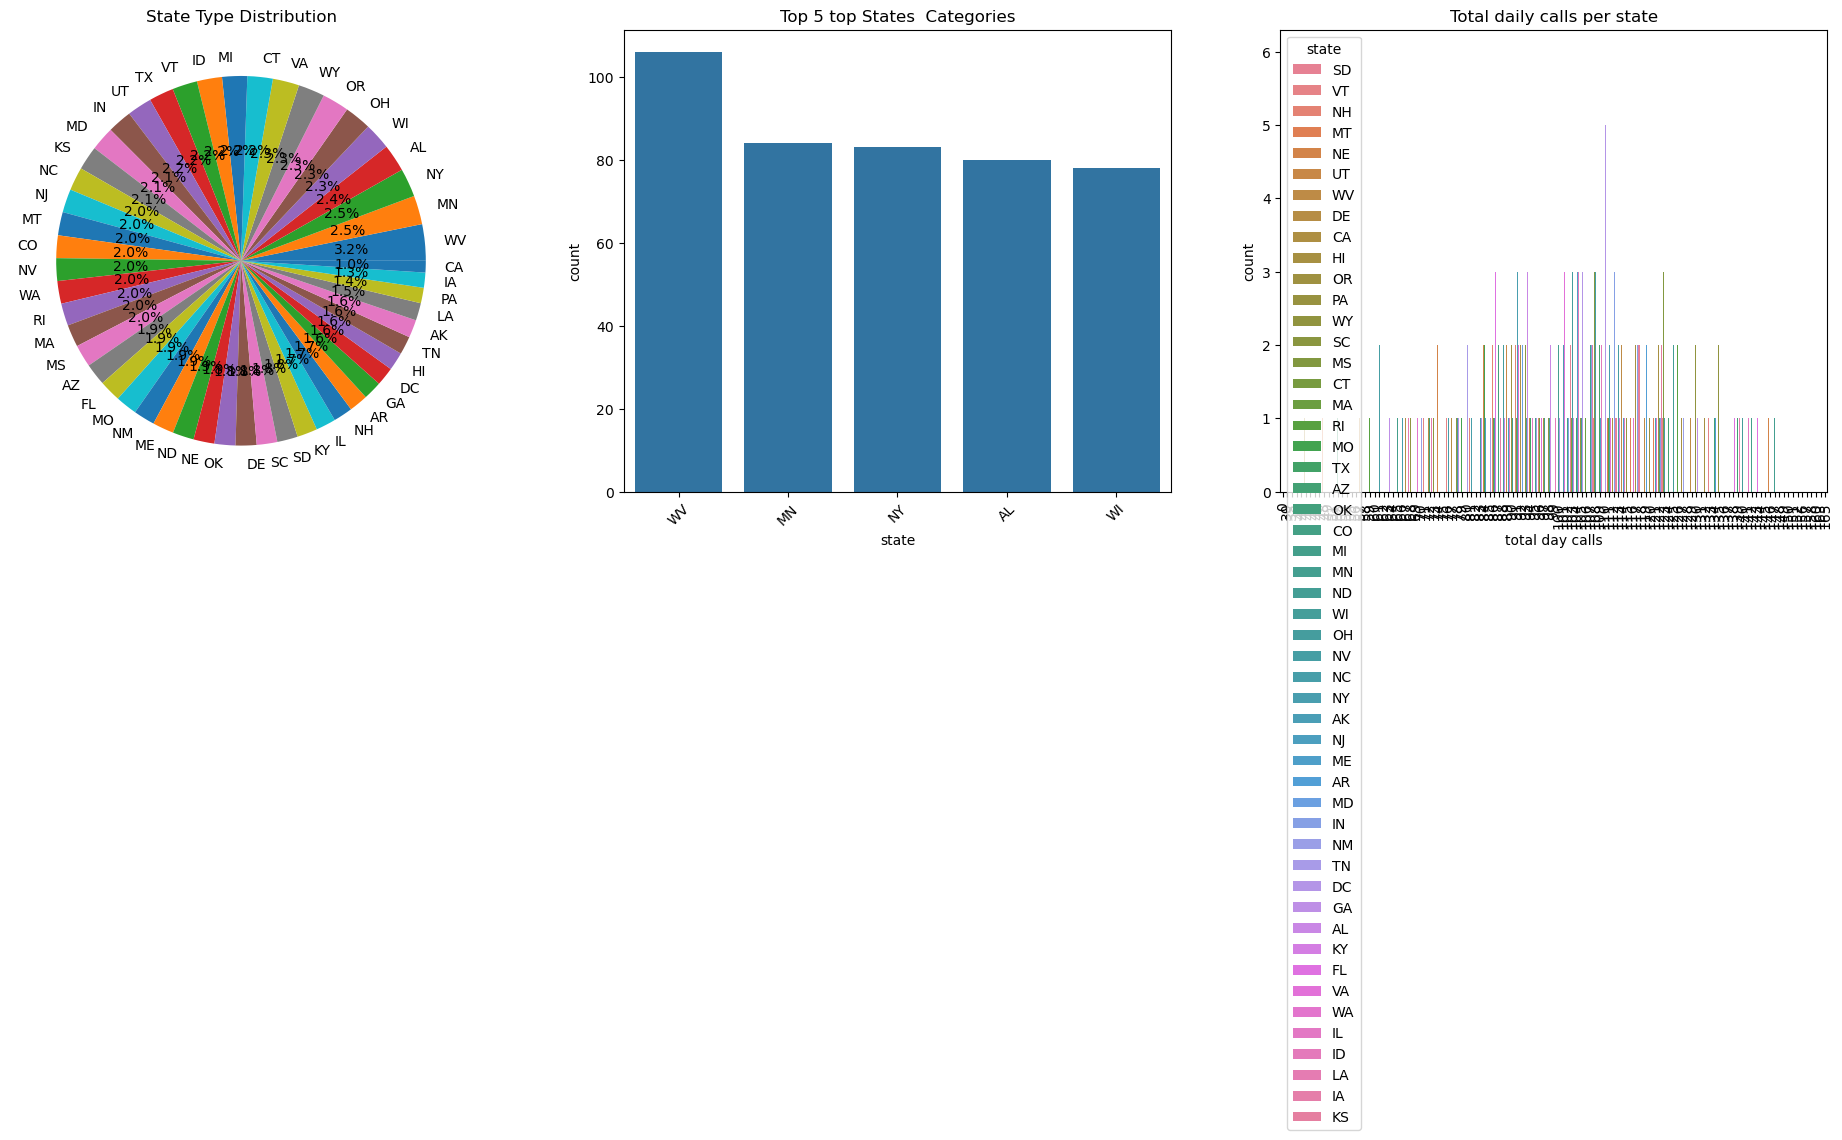

In [532]:
# Compute counts of each state type
state_counts = df['state'].value_counts()

# Get the top 5 injury categories based on count
top_5_categories = df['state'].value_counts().nlargest(5).index

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))  # Set figsize

# Pie chart for Investigation Type Distribution
ax1.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%') # Label and automatically format the % label to 1 dp
ax1.set_title('State Type Distribution')

# Injury severity distribution
sns.countplot(x='state', data=df, order=top_5_categories, ax=ax2)
ax2.set_title('Top 5 top States  Categories')
ax2.tick_params(axis='x', rotation=45)

# Relationship between Aircraft Category and Injury Severity
sns.countplot(x='total day calls', hue='state', data=df, ax=ax3)
ax3.set_title('Total daily calls per state')
ax3.tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

Observation:
West virginia, minnesota, newyork, alabama and wisconsin had many customers respectively.

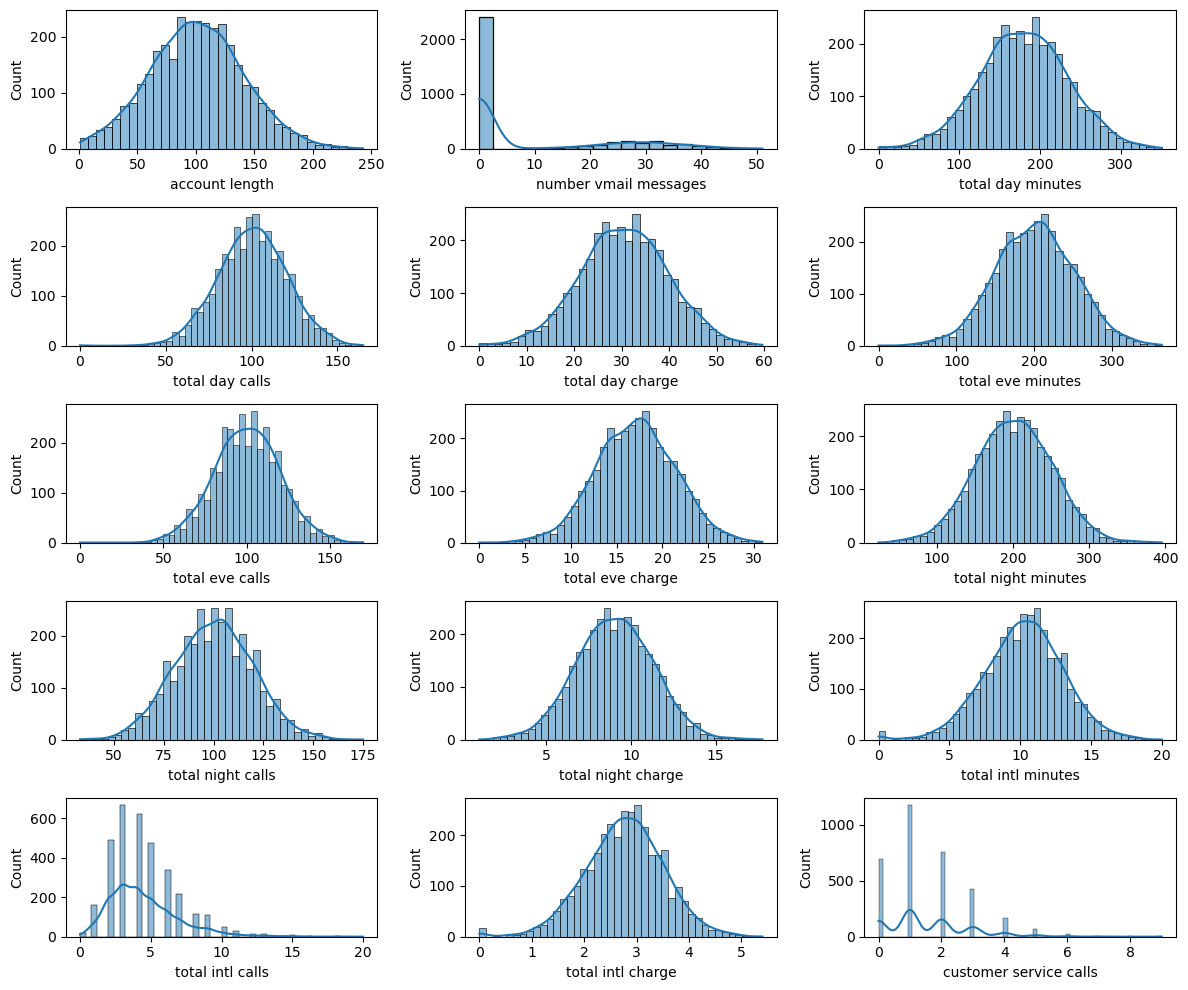

In [533]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) -1) // 4 + 2
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

From the distribution, most categories had a normal distribution except voice mail customers who showed unskewness on the right side showing very few customers made calls. International calls and customer servvice calls also had few cutomers.

In [534]:
#checking the distribution of categorical features
def plot_categorical_distribution(data, feature):

    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=data,color='lightblue', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()


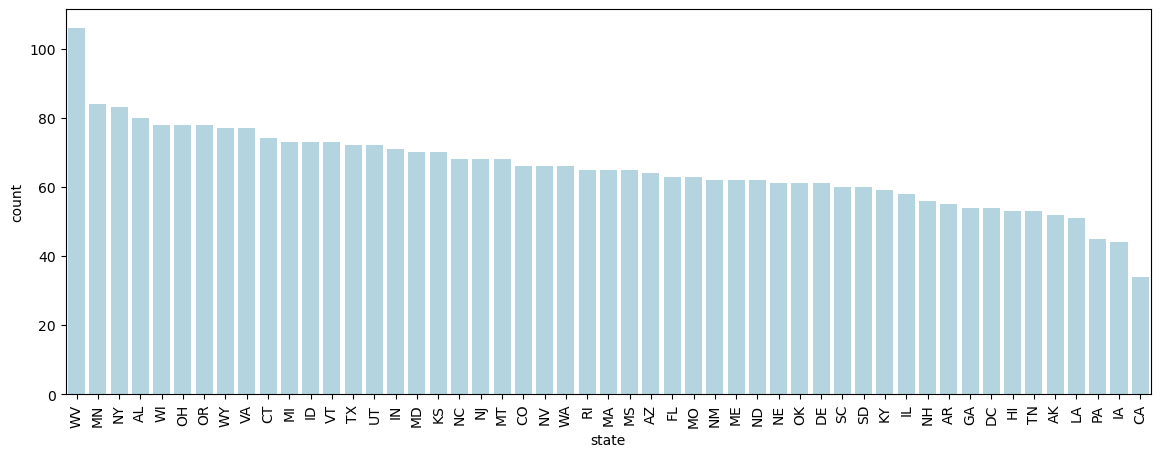

In [535]:
plot_categorical_distribution(data,'state')

Most of the customers are from `West Virginia`,`Minnesota`,`NewYork`,`Alabama` and `Wisconsin`.

In [536]:
data['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

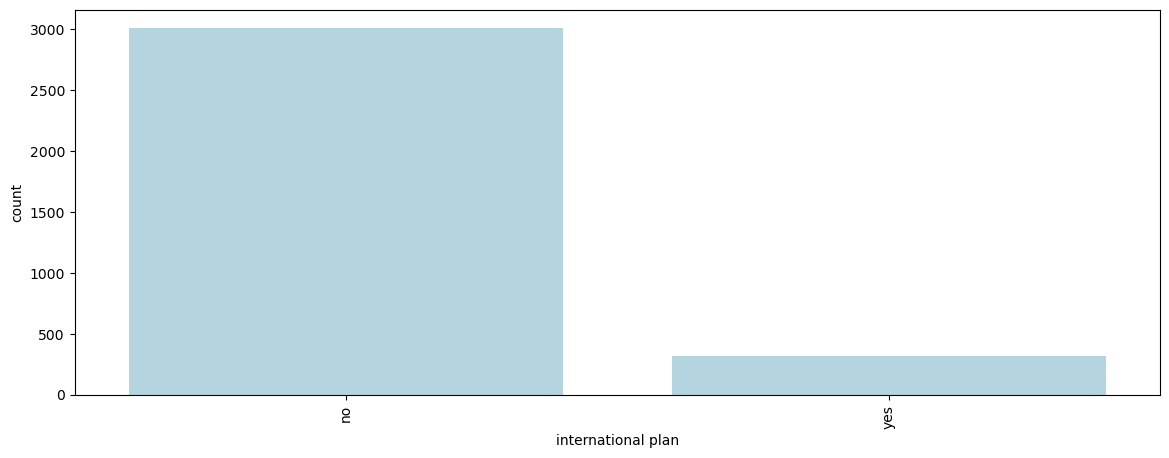

In [537]:
plot_categorical_distribution(data,'international plan')

From the 3333 customers,323 of them have an international plan.

In [538]:
data['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

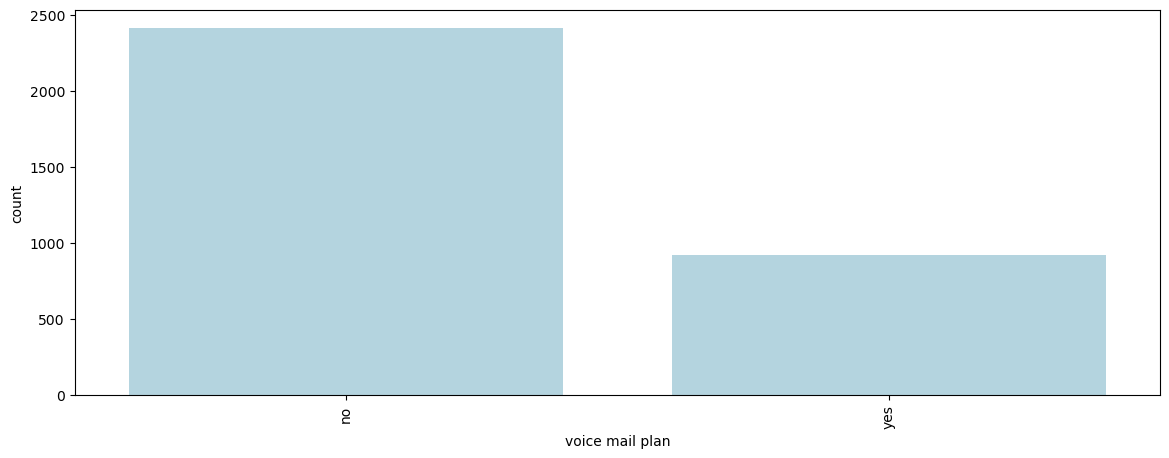

In [539]:
plot_categorical_distribution(data, 'voice mail plan')

From 3333 customers,922 customers have a voicemail plan.

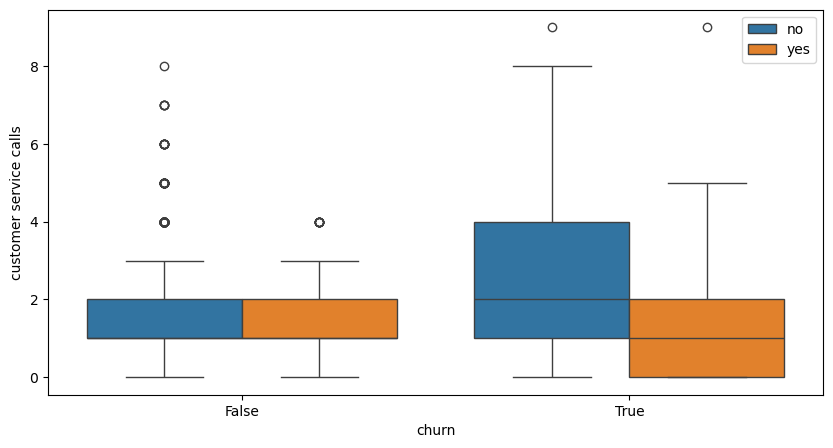

In [540]:
 #Boxplot to see whether customers on international plan  has the highest churn
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='international plan');
plt.legend(loc='upper right');

From the customers who have terminated their account, most of them were  not on international plan.

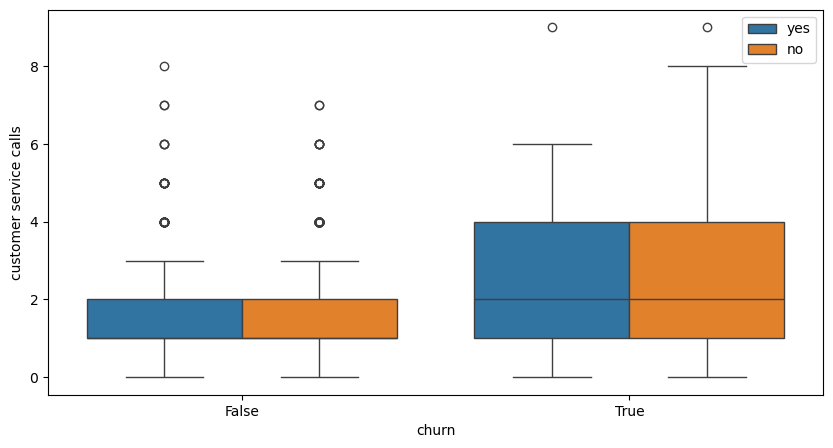

In [541]:
#Boxplot to see whether customers on voivemail plan had the highest churn
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='voice mail plan');
plt.legend(loc='upper right');

In [542]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = data.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=data, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

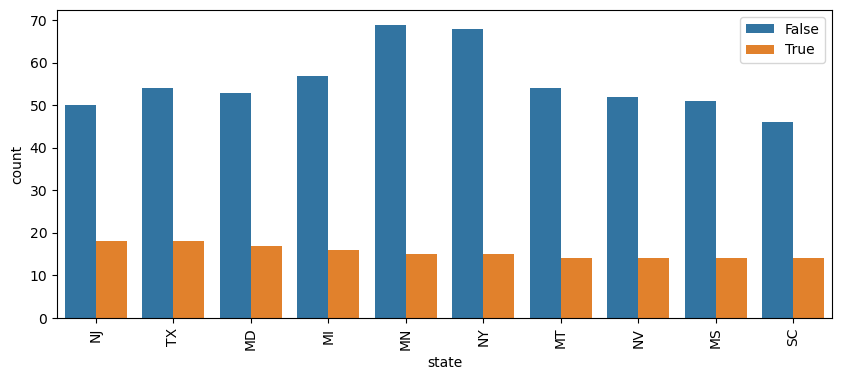

In [543]:
plot_categorical_distribution(data, 'state')

Of all the customers that churned, majority are from `Texas`, `New Jersey`, `Maryland`,`Miami` and `NewYork`.

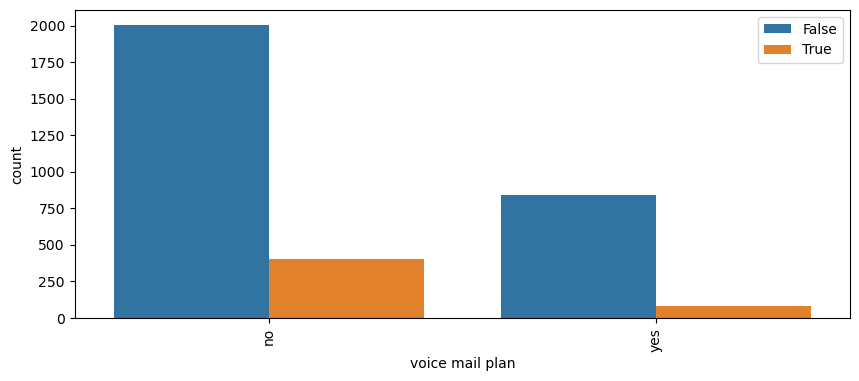

In [544]:
plot_categorical_distribution(data, 'voice mail plan')

The majority of customers who churned did not have voicemail plan.

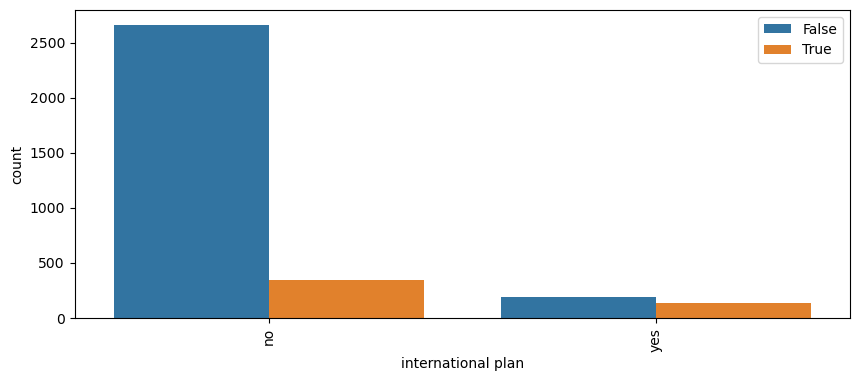

In [545]:
plot_categorical_distribution(data, 'international plan')

The majority of customers who churned did not have an international plan.

In [546]:
def plot_churn_kde(data, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

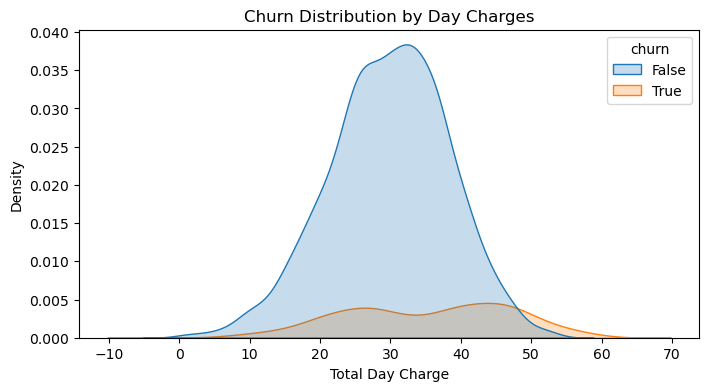

In [547]:
# Churn by day charges
plot_churn_kde(data, 'total day charge', 'Day')

From the analysis, customers who have terminated their accounts have higher total day changes than those who have not terminated their accounts. 

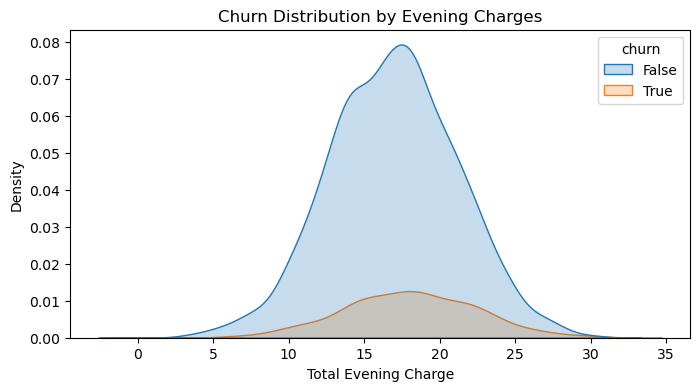

In [548]:
# Churn by evening charges
plot_churn_kde(data, 'total eve charge', 'Evening')

From the analysis, customers who have terminated their accounts have higher total day changes than those who have not terminated their accounts.

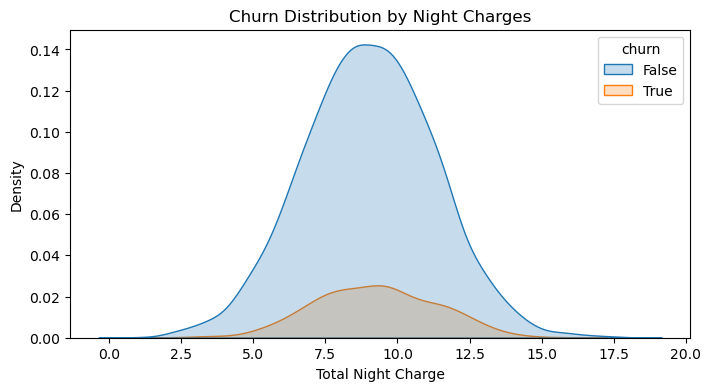

In [549]:
 #Churn by night charges
plot_churn_kde(data, 'total night charge', 'Night')

From the analysis, customers who have terminated their accounts have higher total day changes than those who have not terminated their accounts.

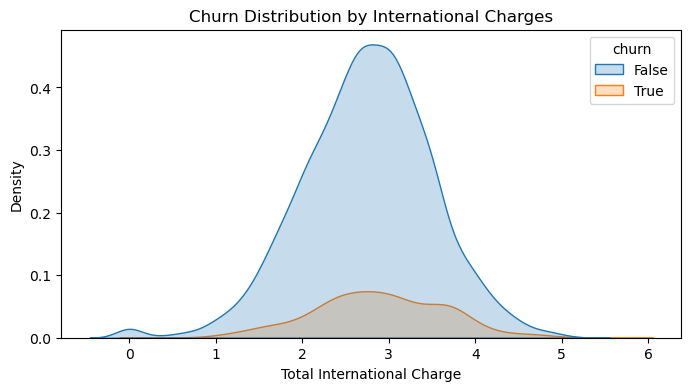

In [550]:
plot_churn_kde(data, 'total intl charge', 'International')

From the analysis, customers who have terminated their accounts have higher total day changes than those who have not terminated their accounts.

# Modelling

Perform One-hot encoding on specific categorical columns in the dataframe creating a new binary colums

In [551]:
data = pd.get_dummies(data,columns = ['state','international plan','voice mail plan'])
data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,False,False,False,False,False,False,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,False,False,False,False,False,False,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,False,False,False,False,False,False,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,False,False,False,False,False,False,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,False,False,False,False,False,False,False,True,True,False



> In this phase, we will build a model that can predict the customer churn based on the features in our dataset. The model will be evaluated on the recall score. Specifically, if it achieves an recall score of 80% or higher, it will be considered a success.

In [552]:
#Defining X and y
X = data.drop("churn", axis=1)
y = data["churn"]

#### Train test split

Splitting data into train and test sets using a test size of 0.5

In [553]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.5, random_state=42)

In [554]:
#instantiate the logistic regression
model = LogisticRegression(random_state=42)

In [555]:
# Fit the model on the training data 
model.fit(X_train,y_train)
#predict on the labels of test set
y_pred = model.predict(X_test)


c:\Users\karay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [556]:
def plot_confusion_matrix(y_true, y_pred):
    cfn = confusion_matrix(y_true=y_test,y_pred=y_pred)
    plt.figure()
    sns.heatmap(cfn,annot=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

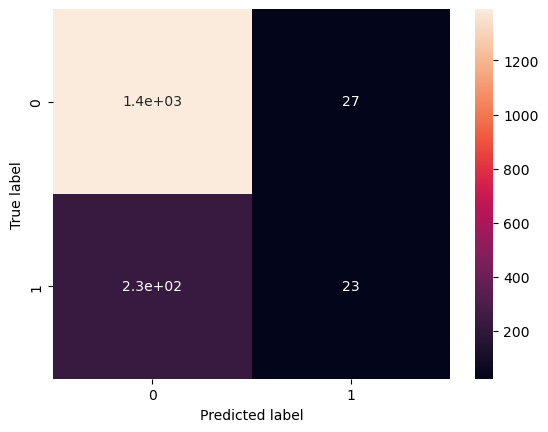

In [557]:
plot_confusion_matrix(y_test, y_pred)

In [558]:
cfn = confusion_matrix(y_true=y_test,y_pred=y_pred)
cfn

array([[1390,   27],
       [ 227,   23]], dtype=int64)

In [559]:
TP = cfn[1][1]
TN = cfn[0][0]
FP = cfn[0][1]
FN = cfn[1][0]

In [560]:
# manualy calculate accuracy
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.847630473905219

This model has a 85%  accuracy which shows that the model impressive

In [561]:
report = classification_report(y_true=y_test,y_pred=y_pred)

print(report)


              precision    recall  f1-score   support

       False       0.86      0.98      0.92      1417
        True       0.46      0.09      0.15       250

    accuracy                           0.85      1667
   macro avg       0.66      0.54      0.53      1667
weighted avg       0.80      0.85      0.80      1667



This model has a good score on precision,recall and f1 which is very good for a model. The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting. 

<Axes: >

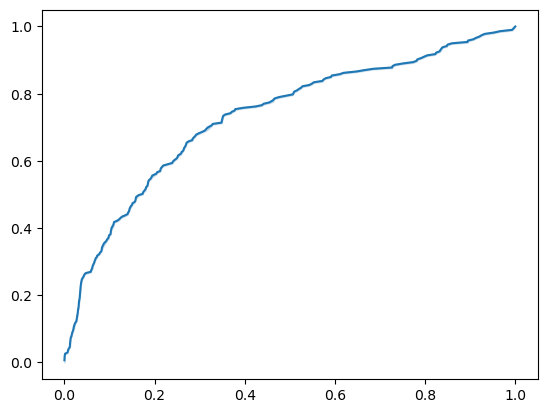

In [562]:
fpr1,tpr1,_ = roc_curve(y_true=y_test,y_score=model.decision_function(X_test))
sns.lineplot(x=fpr1,y=tpr1)

In [563]:

area = auc(fpr1,tpr1)
area

0.7323528581510232

his model was able to identify about 73% of the churned customers.

<Axes: xlabel='churn', ylabel='count'>

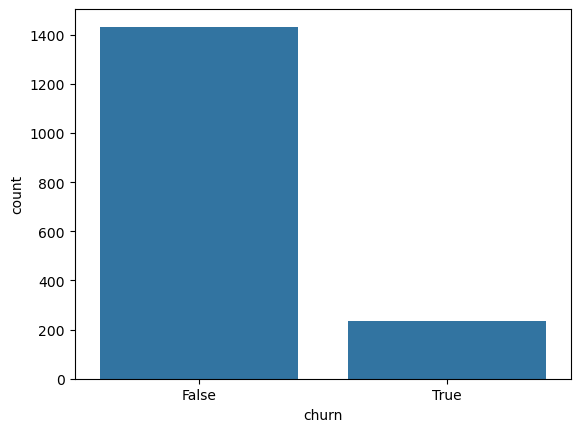

In [564]:
y_train.value_counts()
sns.countplot(x=y_train)

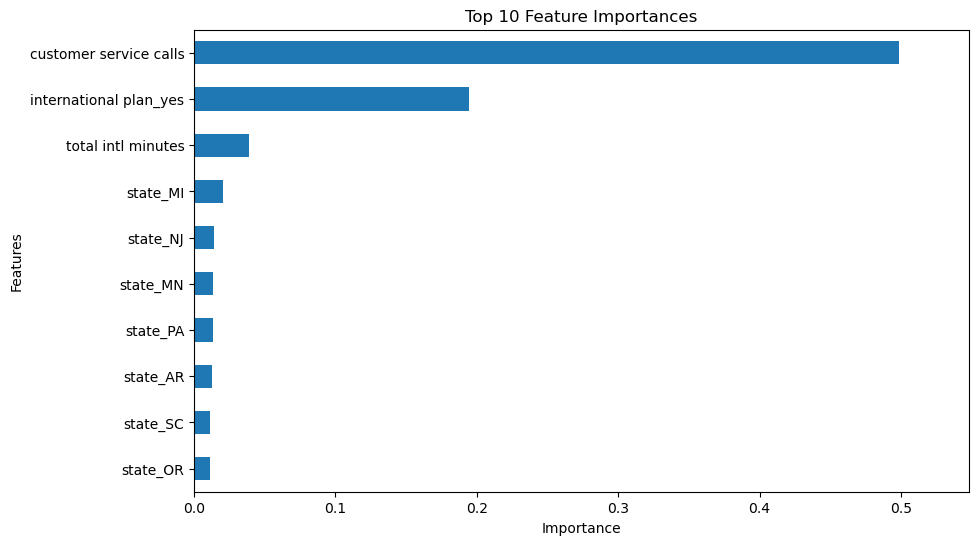

In [569]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

##### Decision tree


In [565]:
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))

ohe_df.head()

,account length_1,account length_3,account length_5,account length_6,account length_7,account length_9,account length_10,account length_11,account length_13,account length_15,...,state_WY_False,state_WY_True,international plan_no_False,international plan_no_True,international plan_yes_False,international plan_yes_True,voice mail plan_no_False,voice mail plan_no_True,voice mail plan_yes_False,voice mail plan_yes_True
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [566]:
#Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Plot the decision tree

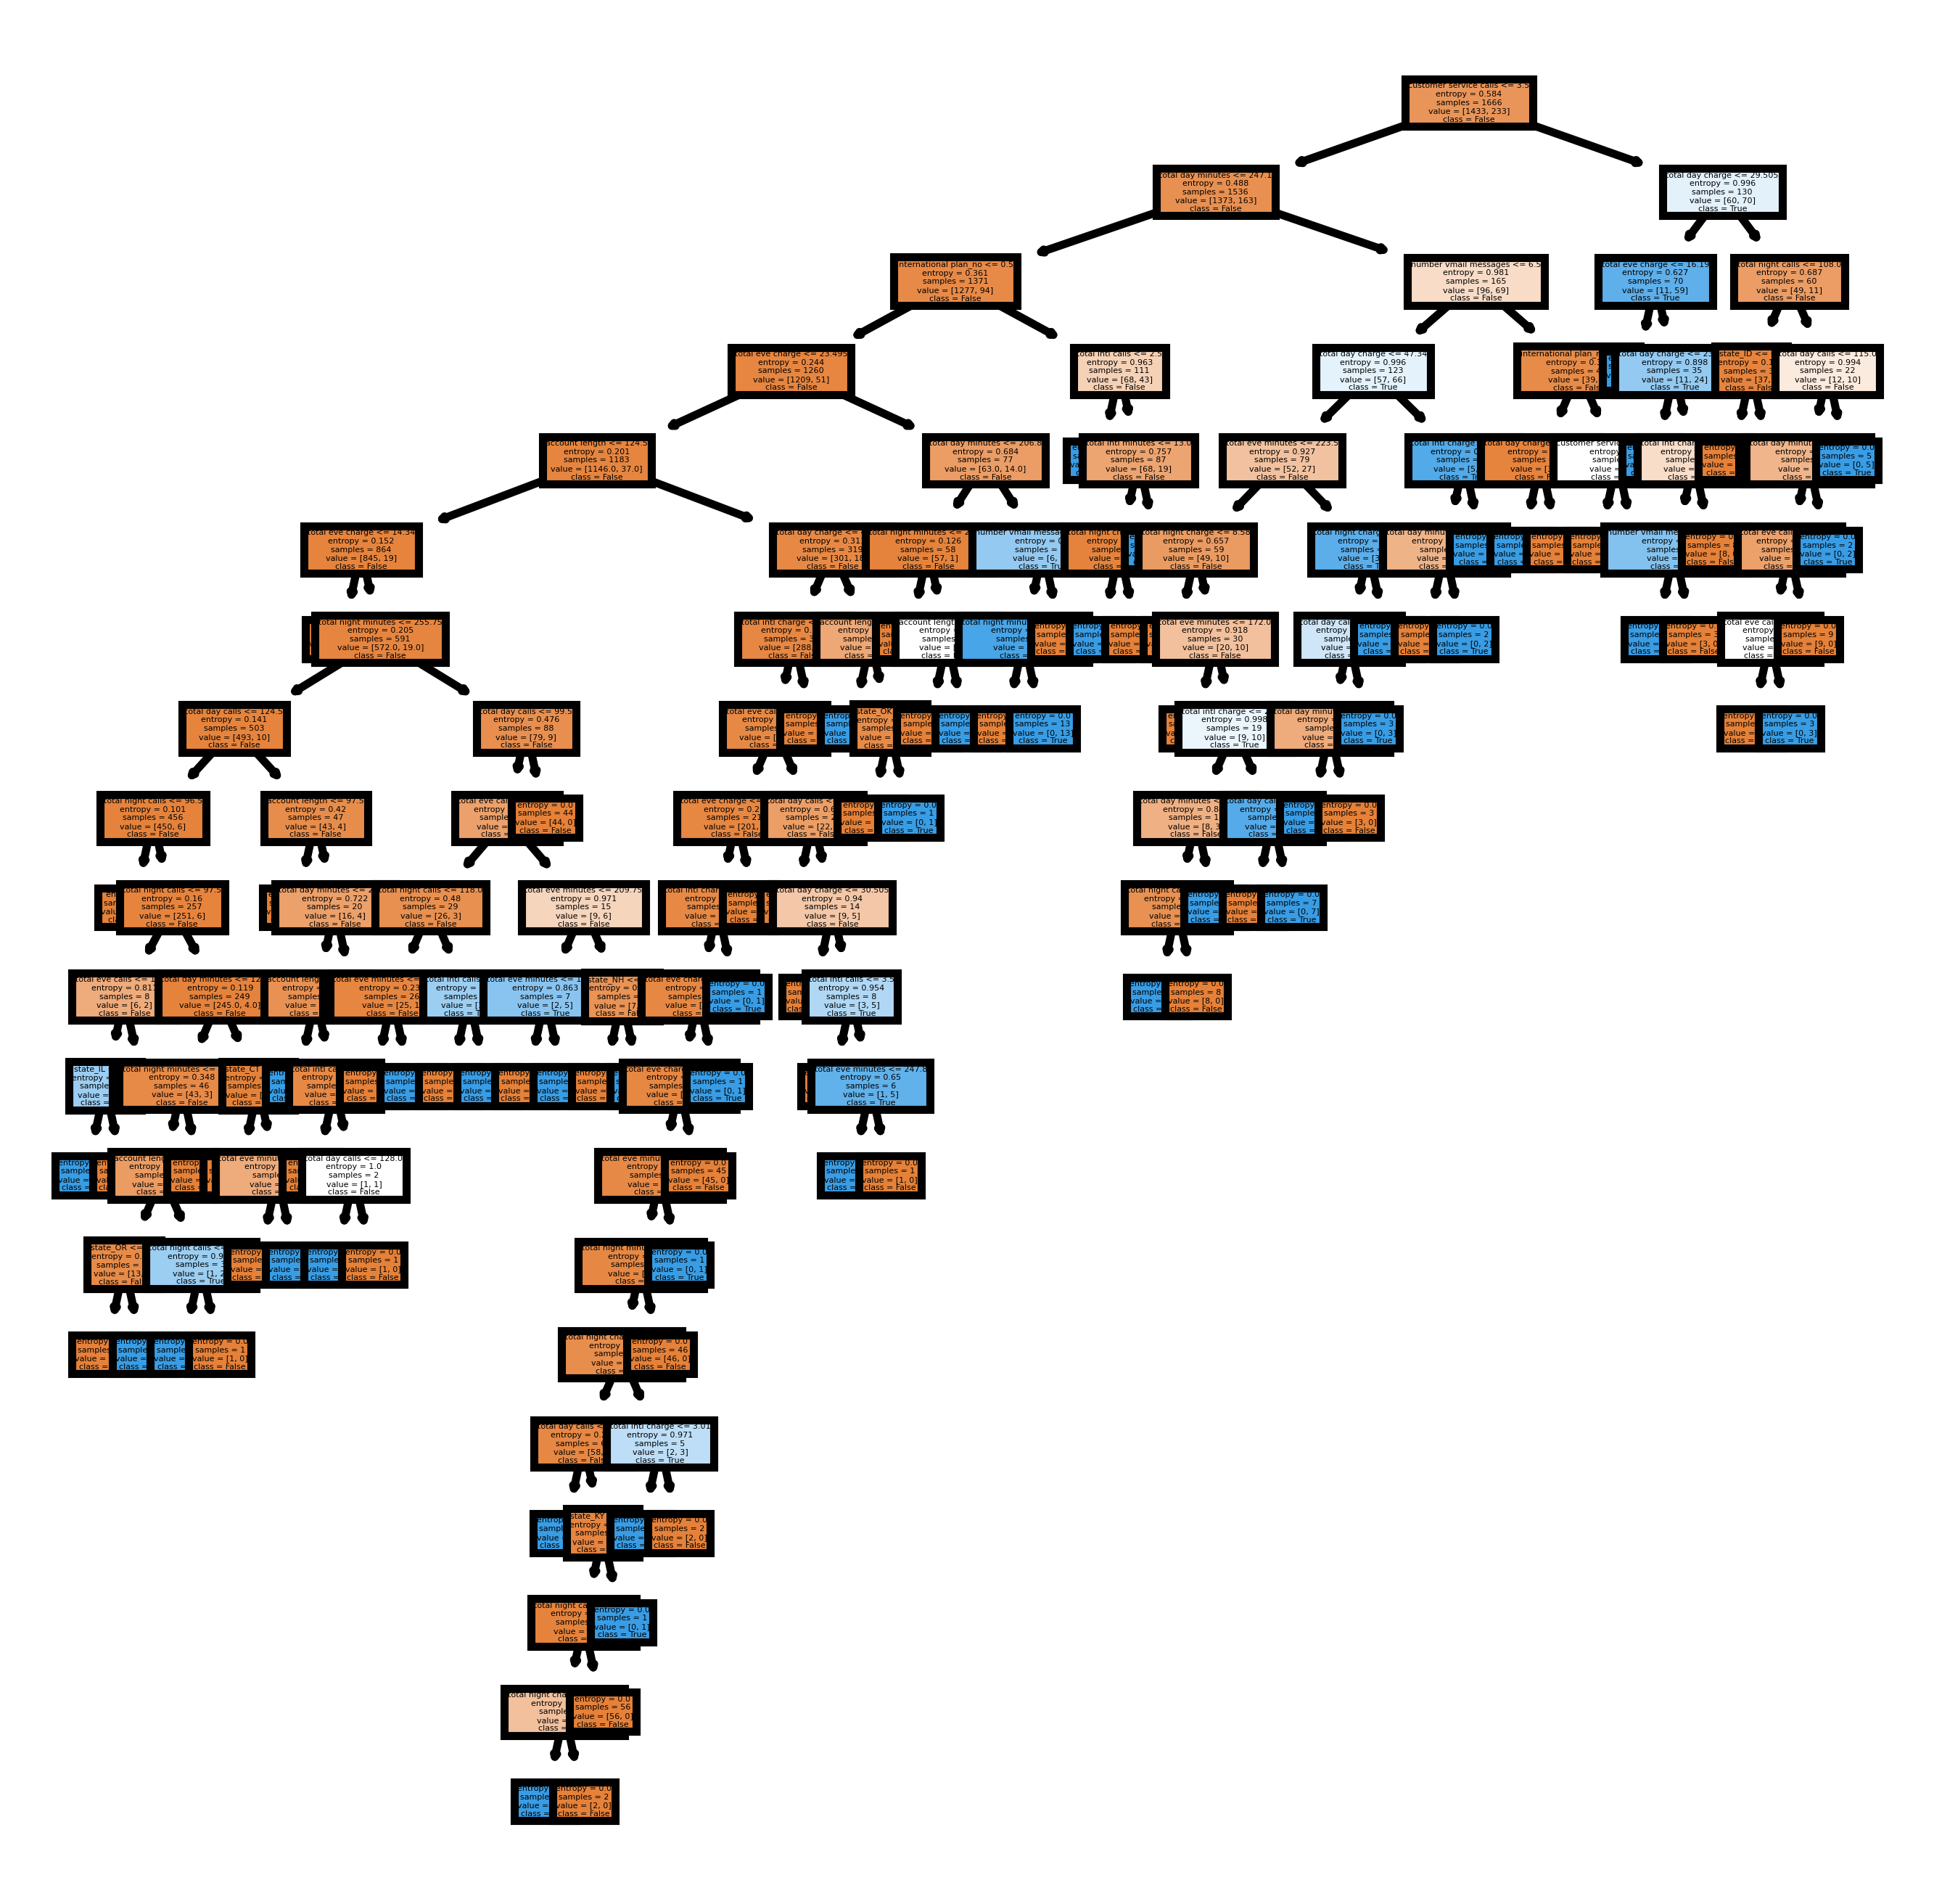

In [567]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=800)
tree.plot_tree(clf,
               feature_names =data.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

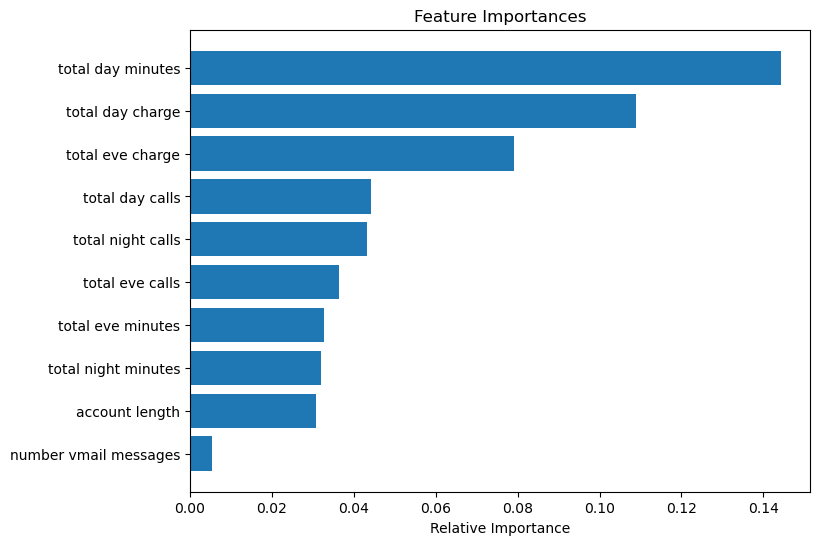

In [519]:
#Feature Importances
feature_names = list(X_train.columns)
importances = clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the model,`total day minutes`, `total day charge`, `total evening charge` are the top three most important features.

In [ ]:
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.6
